# Duboko učenje - laboratorijska vježba - generativni modeli - Boltzmannovi strojevi

U ovoj vježbi pozabavit ćete se s generativnim modelima. Njihova glavna razlika u odnosu na diskriminativne modele je u tome što su predviđeni za generiranje uzoraka karakterističnih za distribuciju uzoraka korištenih pri treniranju. Da bi to mogli raditi na odgovarajući način, nužno je da mogu naučiti bitne karakteristike uzoraka iz skupa za treniranje. Jedna moguća reprezentacija tih bitnih karakteristika je distribucija ulaznih vektora, a model bi uz pomoć takve informacije mogao generirati više uzoraka koji su vjerojatniji (više zastupljeni u skupu za treniranje), a manje uzoraka koji su manje vjerojatni.

Distribucija uzoraka iz skupa za treniranje može se opisati distribucijom vjerojatnosti više varijabli
$p(\mathbf x)$. Vjerojatnost uzoraka za treniranje $\mathbf x^{(i)}$ trebala bi biti visoka dok bi vjerojatnost ostalih uzoraka trebala biti niža. Nasuprot tome, diskriminativni modeli se, na više ili manje izravne načine, fokusiraju na aposteriornu vjerojatnost razreda $d$

$$
p(d\vert \mathbf{x})=\frac{p(d)p(\mathbf{x}\vert d)}{p(\mathbf{x})}
$$

Gornji izraz sugerira da bi poznavanje $p(\mathbf x)$ mogla biti korisna informacija i za diskriminativne modele, iako je oni u pravilu ne koriste direktno. Ipak, logična je pretpostavka da bi preciznije poznavanje $p(\mathbf x)$ moglo pomoći u boljoj procjeni $p(d \vert \mathbf{x})$. Tu ideju dodatno podupire i razumna pretpostavka, da su i ulazni uzorci i odgovarajući razred $d$ (izlaz), posljedica istih bitnih značajki. Ulazni uzorci sadrže u sebi znatnu količinu bitnih informacija, ali često sadrže i šum koji dodatno otežava modeliranje direktne veze sa izlazom. Model veze izlaza i bitnih značajki, očekivano je jednostavniji nego direktna veza ulaza i izlaza.

<center>
    <div>
      <img src="https://dlunizg.github.io/assets/lab4/bitneZ.svg" width="30%">
    </div>
</center>

Ovakva razmišljanja upućuju na upotrebu generativnih modela za ekstrakciju bitnih značajki. Njihova primarna namjena - generiranje uzoraka - tada je u drugom planu. Nakon treniranja, na njih se može nadograditi dodatni diskriminativni model (npr. MLP) koji na temelju bitnih značajki "lako" određuje željeni izlaz. Ova vježba fokusira se na treniranje generativnih modela.

### Ograničeni Boltzmanov stroj (RBM)

Boltzmanov stroj (BM) je [stohastička](https://en.wikipedia.org/wiki/Stochastic_neural_network) [rekurzivna](https://en.wikipedia.org/wiki/Recursive_neural_network) [generativna](https://en.wikipedia.org/wiki/Generative_model) mreža koja treniranjem nastoji maksimizirati $p(\mathbf x^{(i)})$, a temelji se na Boltrmanovoj distribuciji prema kojoj je vjerojatnost stanja $\mathbf x$ to manja, što je veća njegova energija $E(\mathbf x)$ prema sljedećem izrazu

$$
p(\mathbf{x})\propto
e^{\frac{-{E(\mathbf{x})}}{\mathit{kT}}}
$$

Umnožak Boltzmanove konstanta $k$ i termodinamičke temperature $T$ se ignorira, odnosno postavlja na 1.

Pojedini elementi stanja BM-a $x_j$ su binarni i mogu poprimiti vrijednosti 0 i 1. Energetska funkcija $E(\mathbf x)$ kod BM-a određena je elementima stanja $x_j$ i težinama veza $w_{ji}$ između njih te pripadajućim pomacima $b_j$.

$$
E(\mathbf{x})=-\left(\frac{1}{2}\sum _{i=1}^{N}\sum
_{\substack{j=1 \\ j\neq i}}^{N}w_{\mathit{ji}}x_{j}x_{i}+\sum
_{j=1}^{N}b_{j}x_{j}\right)=-\left(\frac{1}{2}\mathbf{x^{T}Wx}+\mathbf{b^{T}x}\right)
$$

Matrica $\mathbf{W}$ je simetrična te ima nule na glavnoj dijagonali. Vjerojatnost pojedinog uzorka definiramo kao 

$$
p(\mathbf{x};\mathbf{W},\mathbf{b})=\frac{e^{-E(\mathbf{x})/T}}{\sum_{\mathbf{x}}e^{-E(\mathbf{x})/T}}=\frac{e^{\frac{1}{2}\mathbf{x^{T}Wx}+\mathbf{b^{T}x}}}{Z(\mathbf{W},\mathbf{b})}
$$

$Z(\mathbf W)$ se naziva particijska funkcija, a uloga joj je normaliziranje vjerojatnosti kako bi

$$
\sum_{\mathbf{x}}p(\mathbf{x};\mathbf{W},\mathbf{b})=1
$$

Prema odabranoj energetskoj funkciji i Boltzmanovoj distribuciji određena je vjerojatnost da pojedini element mreže ima vrijednost 1

$$
p(x_{j}=1)=\frac{1}{1+e^{-\sum
_{i=1}^{N}w_{\mathit{ji}}x_{i}-b_{j}}}=\sigma \left(\sum
_{i=1}^{N}w_{\mathit{ji}}x_{i}+b_{j}\right)
$$

Kako bismo energetskom funkcijom BM-a mogli opisati korelacije višeg reda, odnosno kompleksnije međusobne veze pojedinih elemenata vektora podataka, uvodimo tzv. skrivene varijable $h$. Stvarne podatke nazivamo vidljivim slojem i označavamo s $\mathbf v$, dok skrivene varijable čine skriveni sloj $\mathbf h$.

$$
\mathbf{x}=(\mathbf v,\mathbf h)
$$

RBM je mreža u kojoj nisu dozvoljene međusobne povezanosti unutar istog sloja. To ograničenje (od tuda ime Restricted Boltzman Machine) omogućuje jednostavno osvježavanje stanja mreže. Iako ima poznatu svrhu, skriveni sloj $\mathbf h$ i njegova distribucija $p(\mathbf h)$ nisu poznati. 

<center>
<div class="fig figcenter fighighlight">
  <img src="https://dlunizg.github.io/assets/lab4/rbm.svg" width="10%">
</div>
</center>

Energija mreže sada postaje

$$
E(\mathbf{v},\mathbf{h})=-\mathbf{v^{T}Wh}-\mathbf{b^{T}h}-\mathbf{a^{T}v}
$$

Matrica $\mathbf W$ sadrži težine veza između vidljivog i skrivenog sloja i više nije simetrična, a vektori $\mathbf a$ i $\mathbf b$ sadrže pomake vidljivog i skrivenog sloja.
Prema novoj strukturi i prethodnoj jednadžbi za vjerojatnost pojedinog elementa dobivamo dvije jednadžbe za osvježavanje stanja RBM-a. 

$p(v_{i}=1)=\sigma \left(\sum
_{j=1}^{N}w_{\mathit{ji}}h_{j}+a_{i}\right)$ za vidljivi sloj

$p(h_{j}=1)=\sigma \left(\sum
_{i=1}^{N}w_{\mathit{ji}}v_{i}+b_{j}\right)$ za skriveni sloj

Uzorkovanje vrijednosti pojedine varijable provodi se prema gornje dvije jednadžbe i pomoću generatora slučajnih brojeva.

```python
sampled_tensor = probability_tensor.bernoulli()
```

**Učenje RBM-a**

Prisjetimo se da želimo maksimizirati vjerojatnost svih uzoraka za učenje (stvaranih podatka) koji su u RBM-u predstavljeni vidljivim slojem. Stoga maksimiziramo umnožak svih $p(\mathbf{v}^{(j)})$ gdje je 

$$
p(\mathbf{v};\mathbf{W},\mathbf{a},\mathbf{b})=\sum
_{\mathbf{h}}p(\mathbf{v},\mathbf{h};\mathbf{W},\mathbf{a},\mathbf{b})=\sum
_{\mathbf{h}}{\frac{e^{\mathbf{v}^{T}\mathbf{W}\mathbf{h}+\mathbf{b^{T}h}+\mathbf{a^{T}v}}}{Z(\mathbf{W},\mathbf{a, b})}}
$$

Maksimiziramo logaritam umnoška vjerojatnosti svih vidljivih vektora.

$$
\ln \left[\prod
_{n=1}^{N}p(\mathbf{v}^{(n)};\mathbf{W},\mathbf{a},\mathbf{b})\right]
$$

Da bismo to postigli trebamo odrediti parcijalne derivacije s obzirom na parametre mreže

$\frac{\partial }{\partial w_{\mathit{ij}}}\ln \left[\prod
_{n=1}^{N}p(\mathbf{v}^{(n)};\mathbf{W},\mathbf{a},\mathbf{b})\right]=\sum
_{n=1}^{N}\left[v_{i}^{(n)}h_{j}^{(n)}-\sum
_{\mathbf{v,h}}v_{i}h_{j}p(\mathbf{v,h};\mathbf{W},\mathbf{a},\mathbf{b})\right]=N\left[\langle
v_{i}h_{j}\rangle
_{P(\mathbf{h}\vert \mathbf{v}^{(n)};\mathbf{W},\mathbf{b})}-\langle
v_{i}h_{j}\rangle
_{P(\mathbf{v},\mathbf{h};\mathbf{W},\mathbf{a},\mathbf{b})}\right]$

$\frac{\partial }{\partial b_{j}}\ln \left[\prod
_{n=1}^{N}p(\mathbf{v}^{(n)};\mathbf{W},\mathbf{a},\mathbf{b})\right]=\sum
_{n=1}^{N}\left[h_{j}^{(n)}-\sum
_{\mathbf{v,h}}h_{j}p(\mathbf{v,h};\mathbf{W},\mathbf{a},\mathbf{b})\right]=N\left[\langle
h_{j}\rangle
_{P(\mathbf{h}\vert \mathbf{v}^{(n)};\mathbf{W},\mathbf{b})}-\langle
h_{j}\rangle
_{P(\mathbf{v},\mathbf{h};\mathbf{W},\mathbf{a},\mathbf{b})}\right]$

$\frac{\partial }{\partial a_{j}}\ln \left[\prod
_{n=1}^{N}p(\mathbf{v}^{(n)};\mathbf{W},\mathbf{a},\mathbf{b})\right]=\sum
_{n=1}^{N}\left[v_{j}^{(n)}-\sum
_{\mathbf{v,h}}v_{j}p(\mathbf{v,h};\mathbf{W},\mathbf{a},\mathbf{b})\right]=N\left[\langle
v_{j}\rangle -\langle v_{j}\rangle
_{P(\mathbf{v},\mathbf{h};\mathbf{W},\mathbf{a},\mathbf{b})}\right]$

Konačni izrazi sve tri jednadžbe sadrže po dvije komponenete u kojima $\langle \rangle$ zagrade označavaju usrednjene vrijednosti za $N$ ulaznih uzoraka (obično je to veličina mini grupe). 
Prvi pribrojnici u konačnim izrazima odnose se na stanja mreže kada su ulazni uzorci fiksirani u vidljivom sloju. Za određivanje odgovarajućih stanja skrivenog sloja $\mathbf{h}$ dovoljno je svaki element $h_j$ odrediti prema izrazu za $p(h_j = 1)$.
Drugi pribrojnici odnose se na stanja mreže bez fiksnog vidljivog sloja pa se ta stanja mogu interpretirati kao nešto što mreža zamišlja na temelju trenutne konfiguracije parametara ($\mathbf W$, $\mathbf a$ i $\mathbf b$). Da bi došli do tih stanja trebamo iterativno naizmjence računati nova stanja slojeva ([Gibssovo uzorkovanje](https://en.wikipedia.org/wiki/Gibbs_sampling)) prema izrazima za $p(h_j = 1)$ i $p(v_i = 1)$. Zbog izostanka međusobnih veza elemenata istog sloja, u jednoj iteraciji se prvo paralelno uzorkuju svi skriveni elementi, a nakon toga svi elementi vidljivog sloja. Teoretski, broj iteracija treba biti velik kao bi dobili ono što mreža "stvarno" misli, odnosno kako bi došli do stacionarne distribucije. Tada je svejedno koje početno stanje vidljivog sloja uzmemo. Praktično rješenje ovog problema je Contrastive Divergenvce (CD) algoritam gdje je dovoljno napraviti svega $k$ iteracija (gdje je $k$ mali broj, često i samo 1), a za početna stanja vidljivog sloja uzimamo ulazne uzorke. Iako je ovo odmak od teorije, u praksi se pokazalo da dobro funkcionira. Vizualizacija CD-1 algoritma dana je na slici.

<!--- no judgement for center pls-->
<center>
    <div class="fig figcenter fighighlight">
      <img src="https://dlunizg.github.io/assets/lab4/CD.svg" width="30%">
    </div>
</center>

Korekcija težina i pomaka za ulazni uzorak vi, tada se može realizirati na sljedeći način:

$\Delta w_{\mathit{ij}}= \eta \left[\langle v_{i}h_{j}\rangle ^{0}-\langle
v_{i}h_{j}\rangle ^{1}\right]$, 
$\Delta b_{j}=\eta \left[\langle h_{j}\rangle ^{0}-\langle h_{j}\rangle
^{1}\right]$, 
$\Delta a_{i}=\eta \left[\langle v_{i}\rangle ^{0}-\langle v_{i}\rangle
^{1}\right]$, 

Faktor učenja $\eta$ obično se postavlja na vrijednost manju od 1. Prvi pribrojnik u izrazu za $\Delta w_{\mathit{ij}}$ često se naziva pozitivna faza, a drugi pribrojnik, negativna faza.

U zadacima će se koristiti MNIST baza. Iako pikseli u MNIST slikama mogu poprimiti realne vrijednosti iz raspona [0, 1], svaki piksel možemo promatrati kao vjerojatnost binarne varijable $p(v_i = 1)$.
Ulazne varijable tada možemo tretirati kao stohastičke binarne varjable s [Bernoulijevom razdiobom](https://en.wikipedia.org/wiki/Bernoulli_distribution) i zadanom vjerojatnosti distribucijom $p(v_i = 1)$.

### U sljedećih nekoliko blokova koda nalaze se inicijalizacijske postavke i gotove pomoćne funkcije

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim

from torchvision import datasets, transforms
import tqdm
from torchvision.utils import make_grid

import torch.distributions as tdist

import numpy as np
import tqdm

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
BATCH_SIZE = 50
EPOCHS = 100
VISIBLE_SIZE = 784
HIDDEN_SIZE = 100
GIBBS_SAMPLING_STEPS = 1

In [19]:
def visualize_RBM_weights(weights, grid_width, grid_height, slice_shape=(28, 28)):
    for idx in range(0, grid_width * grid_height):
        plt.subplot(grid_height, grid_width, idx+1)
        plt.imshow(weights[..., idx].reshape(slice_shape))
        plt.axis('off')

In [20]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor()
                               ])), batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor()
                               ])), batch_size=BATCH_SIZE)

### 1. zadatak - Restricted Boltzmann Machine

Implementirajte RBM koji koristi CD-1 za učenje. Ulazni podaci neka su MNIST brojevi. Vidljivi sloj tada mora imati 784 elementa, a skriveni sloj neka ima 100 elemenata. Kako su vrijednosti ulaznih uzoraka (slika) realne u rasponu [0 1], oni mogu poslužiti kao $p(v_i = 1)$ pa za inicijalne vrijednosti vidljivog sloja trebate provesti uzorkovanje. Koristitie mini grupe veličine 100 uzoraka, a treniranje neka ima 100 epoha.

**Podzadaci:**

1. Vizualizirajte težine $\mathbf W$ ostvarene treniranjem te pokušajte interpretirati ostvarene težine pojedinih skrivenih neurona.
2. Vizualizirajte rezultate rekonstrukcije prvih 10 testnih uzoraka MNIST baze. Kao rezultat rekonstukcije koji ćete prikazati, koristite $p(v_{i}=1)=\sigma \left(\sum_{j=1}^{N}w_{\mathit{ji}}h_{j}+a_{i}\right)$, umjesto binarnih vrijednosti dobivenih uzorkovanjem.
3. Slučajno inicijalizirajte skriveni sloj, provedite nekoliko Gibbsovih uzorkovanje te vizualizirajte generirane uzorke vidljivog sloja
4. Težine (W, v, h) spremite u datoteku "zad1_rbm.th" i uploadajte na Moodle.
5. Sve tražene grafove iz podzadataka 1 i 2 predajte na Moodle.
6. Odgovorite na sljedeće pitanje **u bilježnici**. Bilježnicu na kraju predajte na Moodle.

**NAPOMENA**: Osim nadopunjavanja koda koji nedostaje, predložak se treba prilagođavati prema potrebi, a može i prema vlastitim preferencijama. Stoga **budite oprezni s tvrdnjama da vam neki dio koda ne radi!**

**Pitanje:**

Povećajte broj Gibsovih uzorkovanja k u CD-k. Opišite razlike.

**Odgovor**:

In [21]:
class RBM():
    
    def __init__(self, visible_size, hidden_size, cd_k=1):
        self.v_size = visible_size
        self.h_size = hidden_size
        self.cd_k = cd_k
        
        normal_dist = tdist.Normal(0, 0.1)
        
        self.W = torch.Tensor(normal_dist.sample(sample_shape=(self.v_size, self.h_size)))   
        self.v_bias = torch.Tensor(torch.zeros(self.v_size)) 
        self.h_bias = torch.Tensor(torch.zeros(self.h_size)) 

    
    def forward(self, batch):
        return self._cd_pass(batch)
    
    
    def __call__(self, batch):
        return self.forward(batch)
    
    
    def _cd_pass(self, batch):
        batch = batch.view(-1, 784) 

        h0_prob = torch.sigmoid(torch.matmul(self.W.T, batch.T).T + self.h_bias) 
        h0 = h0_prob.bernoulli() 

        h1 = h0
        
        for step in range(0, self.cd_k):
            v1_prob = torch.sigmoid(torch.matmul(self.W, h1.T).T + self.v_bias) 
            v1 = v1_prob.bernoulli()

            h1_prob = torch.sigmoid(torch.matmul(self.W.T, v1.T).T + self.h_bias) 
            h1 = h1_prob.bernoulli()
        
        return h0_prob, h0, h1_prob, h1, v1_prob, v1
    
    def reconstruct(self, h, gibbs_steps=None):
        h1 = h
        
        steps_to_do = self.cd_k
        if gibbs_steps is not None:
            steps_to_do = gibbs_steps

        for step in range(0, steps_to_do):
            v1_prob = torch.sigmoid(torch.matmul(self.W, h1.T).T + self.v_bias) 
            v1 = v1_prob.bernoulli()
            h1_prob = torch.sigmoid(torch.matmul(self.W.T, v1.T).T + self.h_bias) 
            h1 = h1_prob.bernoulli()

        return h1_prob, h1, v1_prob, v1

    
    def update_weights_for_batch(self, batch, learning_rate=0.01):
        batch = batch
        h0_prob, h0, h1_prob, h1, v1_prob, v1 = self._cd_pass(batch)

        w_positive_grad = batch.T @ h0
        w_negative_grad = v1.T @ h1

        dw = (w_positive_grad - w_negative_grad) / batch.shape[0]
        dv_bias = (v1 - batch) / batch.shape[0]
        dh_bias = (h1 - h0) / batch.shape[0]

        self.W = self.W + learning_rate * dw
        self.v_bias = self.v_bias + learning_rate * torch.mean(dv_bias, axis=0)
        self.h_bias = self.h_bias + learning_rate * torch.mean(dh_bias, axis=0)

In [22]:
model = RBM(visible_size=VISIBLE_SIZE, hidden_size=HIDDEN_SIZE, cd_k=GIBBS_SAMPLING_STEPS)

In [23]:
for curr_epoch in tqdm.tqdm(range(0, EPOCHS)):
    for sample, label in train_loader:
        sample = sample.view(-1, 784)
        model.update_weights_for_batch(sample, 0.1)

100%|██████████| 100/100 [15:52<00:00,  9.53s/it]


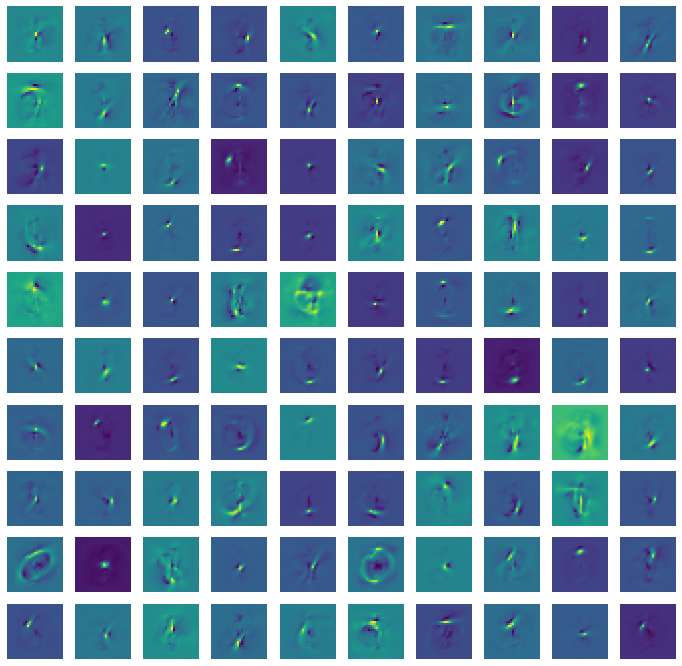

In [24]:
plt.figure(figsize=(12, 12), facecolor='w')
visualize_RBM_weights(model.W.data, 10, 10)

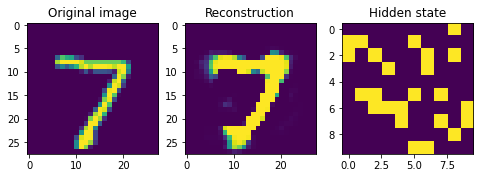

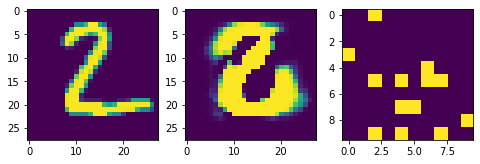

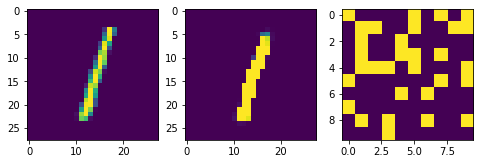

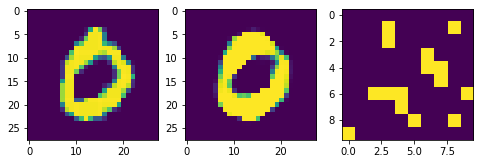

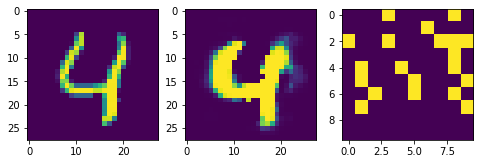

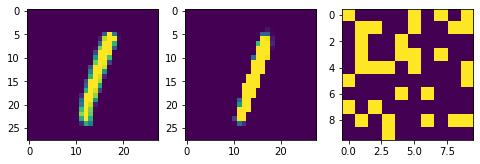

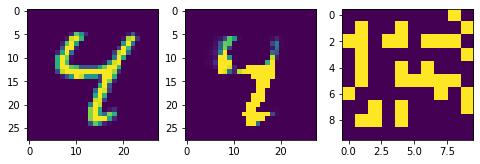

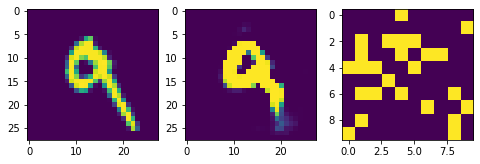

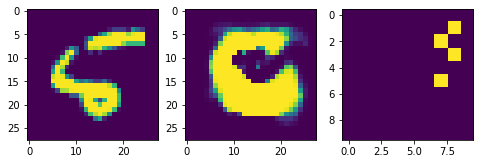

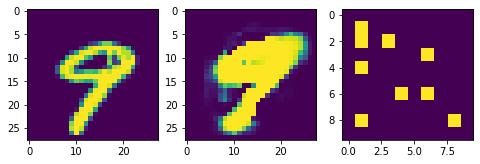

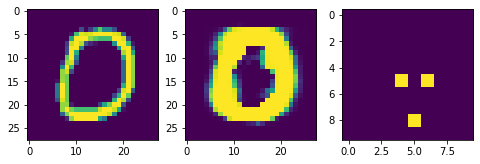

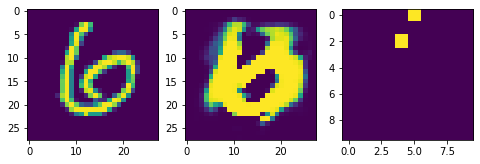

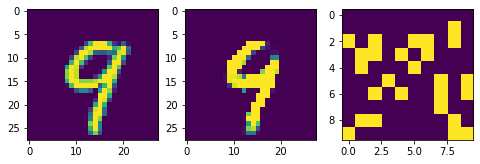

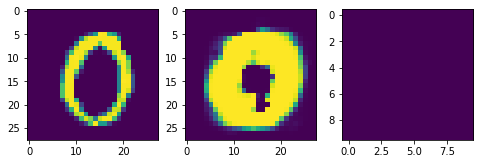

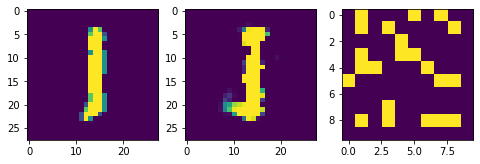

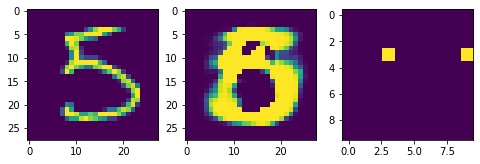

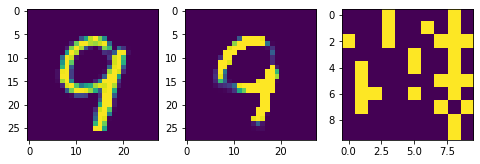

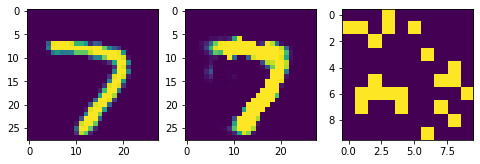

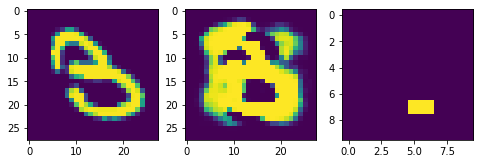

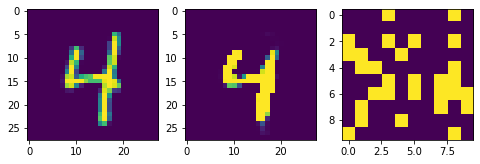

In [25]:
sample, _ = next(iter(test_loader))
sample = sample.view(-1, 784)

for idx in range(0, 20): 
    h0_prob, h0, h1_prob, h1, v1_prob, v1 = model(sample)


    plt.figure(figsize=(8, 4), facecolor='w')
    plt.subplot(1, 3, 1)
    plt.imshow(sample[idx, ...].view(28, 28))
    if idx == 0:
        plt.title("Original image")

    plt.subplot(1, 3, 2)
    recon_image = v1_prob[idx, ...].view(28, 28)
    plt.imshow(recon_image.data)
    if idx == 0:
        plt.title("Reconstruction")
    
    plt.subplot(1, 3, 3)
    state_image = h1[idx, ...].view(10, 10)
    plt.imshow(state_image.data)
    if idx == 0:
        plt.title("Hidden state")

### Sljedeća dva bloka koda odnose se na inkrementalnu vizualizaciju rekonstrukcije. Ta vizualizacija je ovdje kao pomoć u intuitivnom razumijevanju funkcioniranja rekonstrukcije uzoraka i nije ju potrebno upladatai na Moodle

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def draw_rec(inp, title, size, Nrows, in_a_row, j):
    plt.subplot(Nrows, in_a_row, j)
    plt.imshow(inp.reshape(size), vmin=0, vmax=1, interpolation="nearest")
    plt.title(title)
    plt.axis('off')
    
    
def reconstruct(ind, states, orig, weights, biases, h1_shape=(10, 10), v_shape=(28,28)):
    j = 1
    in_a_row = 6
    Nimg = states.shape[1] + 3
    Nrows = int(np.ceil(float(Nimg+2)/in_a_row))
    
    plt.figure(figsize=(12, 2*Nrows))
       
    draw_rec(states[ind], 'states', h1_shape, Nrows, in_a_row, j)
    j += 1
    draw_rec(orig[ind], 'input', v_shape, Nrows, in_a_row, j)
    
    reconstr = biases.copy()
    j += 1
    draw_rec(sigmoid(reconstr), 'biases', v_shape, Nrows, in_a_row, j)
    
    for i in range(h1_shape[0] * h1_shape[1]):
        if states[ind,i] > 0:
            j += 1
            reconstr = reconstr + weights[:,i]
            titl = '+= s' + str(i+1)
            draw_rec(sigmoid(reconstr), titl, v_shape, Nrows, in_a_row, j)
    plt.tight_layout()

<ipython-input-26-2d47fb64c430>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


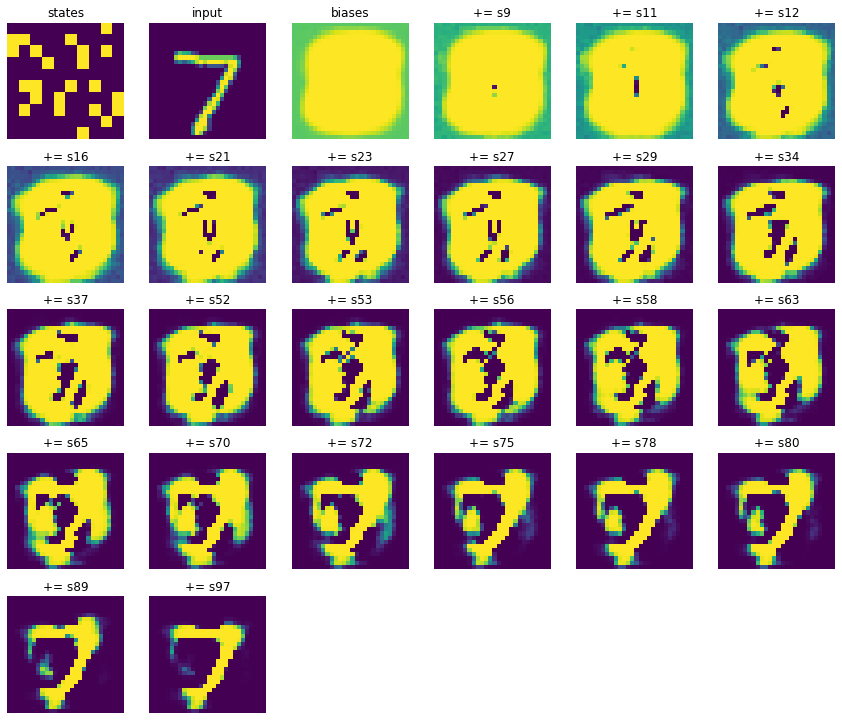

In [28]:
sample, _ = next(iter(test_loader))
sample = sample[0, ...].view(-1, 784)

h0_prob, h0, h1_prob, h1, v1_prob, v1 = model(sample)
reconstruct(0, h1, sample.numpy(), model.W.numpy(), model.v_bias.numpy())

In [29]:
# Generiranje uzoraka iz slučajnih vektora
r_input = np.random.rand(100, HIDDEN_SIZE)
r_input[r_input > 0.9] = 1 # postotak aktivnih - slobodno varirajte
r_input[r_input < 1] = 0
r_input = r_input * 20 # pojačanje za slučaj ako je mali postotak aktivnih

s = 10
i = 0
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s

h1_prob, h1, v1_prob, v1 = model.reconstruct(torch.from_numpy(r_input).float(), 50)

<Figure size 1152x1152 with 0 Axes>

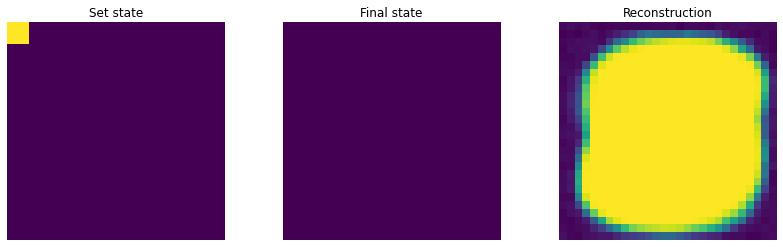

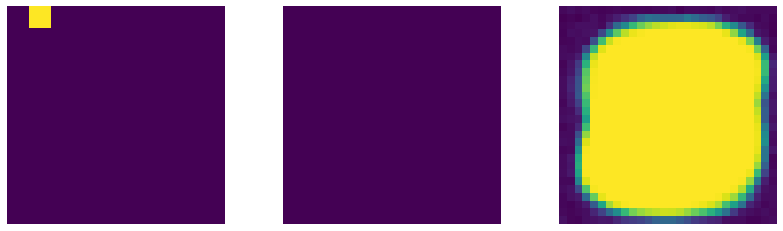

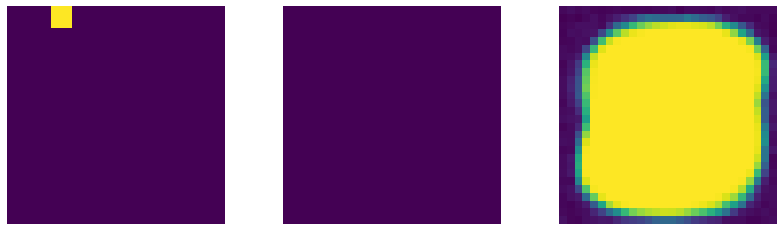

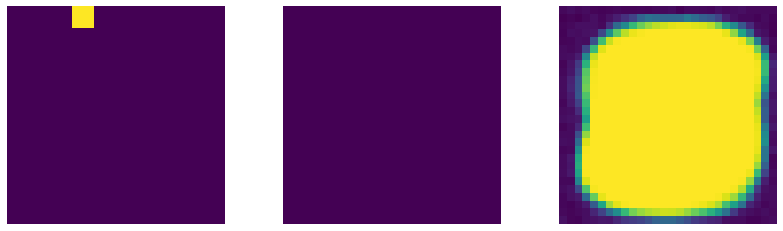

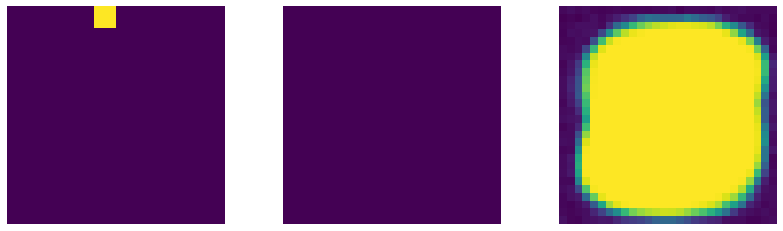

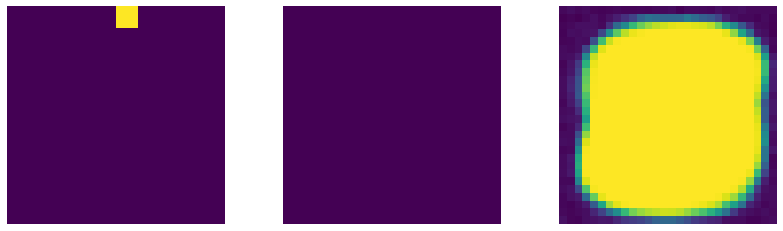

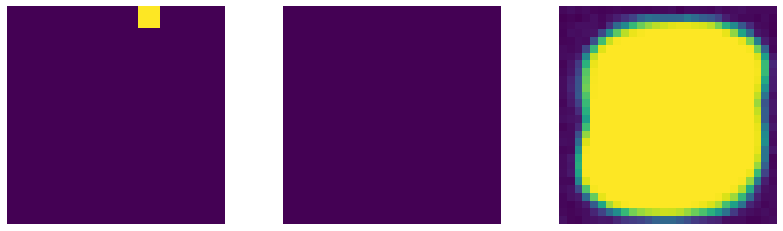

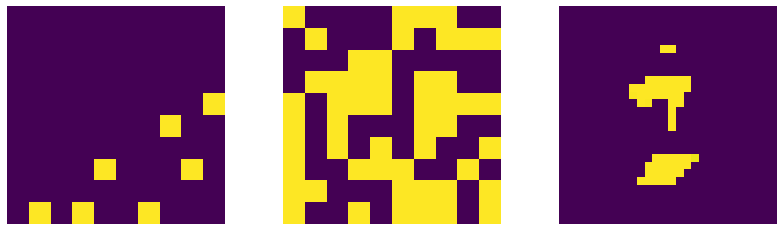

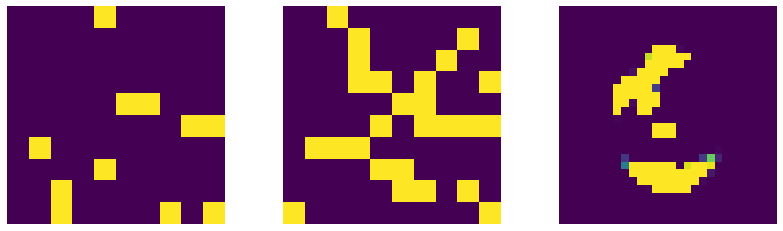

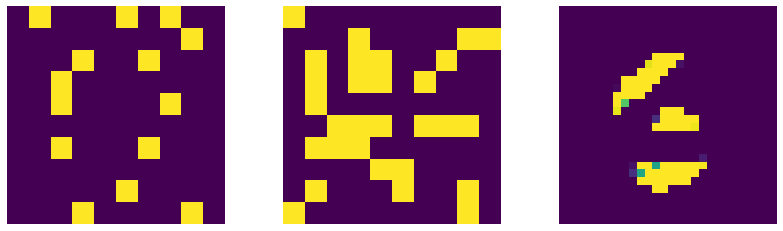

In [31]:
plt.figure(figsize=(16, 16))
for idx in range(0, 10):
    plt.figure(figsize=(14, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(r_input[idx, ...].reshape(10, 10))
    if idx == 0:
        plt.title("Set state")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(h1[idx,...].view(10, 10))
    if idx == 0:
        plt.title("Final state")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(v1_prob[idx, ...].view(28, 28))
    if idx == 0:
        plt.title("Reconstruction")
    plt.axis('off')

In [32]:
with open('zad1_rbm.th', 'wb') as f:
    torch.save({
        'rbm_w': model.W,
        'rbm_v': model.v_bias,
        'rbm_h': model.h_bias
    }, f)

### 2. zadatak - Deep Belief Network

Deep belief Network (DBN) je duboka mreža koja se dobije slaganjem više RBM-ova jednog na drugi, pri čemu se svaki sljedeći RBM pohlepno trenira pomoću skrivenog ("izlaznog") sloja prethodnog RBM-a (osim prvog RBM-a koji se trenira direktno s ulaznim uzorcima). Teoretski, tako izgrađen DBN trebao bi povećati $p(\mathbf v)$ što nam je i cilj. Korištenje DBN, odnosno rekonstrukcija ulaznog uzorka provodi se prema donjoj shemi. U prolazu prema gore određuju se skriveni slojevi iz vidljivog sloja dok se ne dođe do najgornjeg RBM-a, zatim se na njemu provede CD-k algoritam, nakon čega se, u prolasku prema dolje, određuju niži skriveni slojevi dok se ne dođe do rekonstruiranog vidljivog sloja. Težine između pojedinih slojeva su iste u prolazu gore kao i u prolazu prema dolje. Implementirajte troslojni DBN koji se sastoji od dva pohlepno pretrenirana RBM-a. Prvi RBM neka je isit kao i u 1. zadatku, a drugi RBM neka ima skriveni sloj od 100 elemenata.

Deep Belief Network se može prikazati kao:
<center>
<div>
  <img src="https://dlunizg.github.io/assets/lab4/DBN1.svg" width="35%">
</div>
</center>


**Podzadaci:**

1. Vizualizirajte težine $\mathbf W_2$ ostvarene treniranjem.
2. Vizualizirajte rezultate rekonstrukcije prvih 10 testnih uzoraka MNIST baze. 
3. Spremite težine naučenog modela u datoteku "zad2_dbn.th" i uploadajte na Moodle.
4. Sve grafove tražene u podzadacima 1 i 2 predajte na Moodle.
5. Odgovorite na sljedeće pitanje **u bilježnici**. Bilježnicu na kraju predajte na Moodle.


**NAPOMENA**: Osim nadopunjavanja koda koji nedostaje, predložak se treba prilagođavati prema potrebi, a može i prema vlastitim preferencijama. Stoga **budite oprezni s tvrdnjama da vam neki dio koda ne radi!**

**Pitanje:**

Slučajno inicijalizirajte krovni skriveni sloj, provedite nekoliko Gibbsovih uzorkovanje te vizualizirajte generirane uzorke vidljivog sloja - usporedite s prethodnim zadatkom te upišite svoja zapažanja u polje "Odgovor".

**Odgovor:**

In [33]:
class DBN():

    def __init__(self, first_rbm: RBM, second_hidden_size, cd_k=1):
        self.v_size = first_rbm.v_size
        self.h1_size = first_rbm.h_size
        self.h2_size = second_hidden_size
        self.cd_k = cd_k
        
        normal_dist = tdist.Normal(0, 0.1)
        
        self.W1 = first_rbm.W
        self.v_bias = first_rbm.v_bias.clone()
        self.h1_bias = first_rbm.h_bias.clone()
        
        self.W2 = torch.Tensor(normal_dist.sample(sample_shape=(self.h1_size, self.h2_size)))
        self.h2_bias = torch.Tensor(torch.zeros(self.h2_size))
    
    
    def forward(self, batch, steps=None):
        batch = batch.view(-1, 784)
        
        h1up_prob = torch.sigmoid(torch.matmul(self.W1.T, batch.T).T + self.h1_bias)
        h1up = h1up_prob.bernoulli() 

        h2up_prob = torch.sigmoid(torch.matmul(self.W2.T, h1up.T).T + self.h2_bias)
        h2up = h2up_prob.bernoulli() 
        
        h1down_prob, h1down, h2down_prob, h2down = self.gibbs_sampling(h2up, steps)
        
        return h1up_prob, h1up, h2up_prob, h2up, h1down_prob, h1down, h2down_prob, h2down

    
    def gibbs_sampling(self, h2, steps=None):
        h2down = h2
        
        steps_to_do = self.cd_k
        
        if steps is not None:
            steps_to_do = steps

        for step in range(0, steps_to_do):
            h1down_prob = torch.sigmoid(torch.matmul(self.W2, h2down.T).T + self.h1_bias)
            h1down = h1down_prob.bernoulli()

            h2down_prob = torch.sigmoid(torch.matmul(self.W2.T, h1down.T).T + self.h2_bias)
            h2down = h2down_prob.bernoulli() 
            
        return h1down_prob, h1down, h2down_prob, h2down 
    
    def reconstruct(self, h2, steps=None):
        _, _, h2down_prob, h2down = self.gibbs_sampling(h2, steps)
        
        h1down_prob = torch.sigmoid(torch.matmul(self.W2, h2down.T).T + self.h1_bias)
        h1down = h1down_prob.bernoulli()
        
        v_prob = torch.sigmoid(torch.matmul(self.W1, h1down.T).T + self.v_bias) 
        v_out = v_prob.bernoulli()

        return v_prob, v_out, h2down_prob, h2down
    
    def update_weights_for_batch(self, batch, learning_rate=0.01):
        h1up_prob, h1up, h2up_prob, h2up, h1down_prob, h1down, h2down_prob, h2down = self.forward(batch)

        w2_positive_grad = h1up.T @ h2up
        w2_negative_grad = h1down.T @ h2down

        dw2 = (w2_positive_grad - w2_negative_grad) / h1up.shape[0]
        dh2_bias = (h2up - h2down) / h1up.shape[0]
        dh1_bias = (h1up - h1down) / batch.shape[0]

        self.W2 = self.W2 + learning_rate * dw2
        self.h1_bias = self.h1_bias + learning_rate * torch.mean(dh1_bias, axis=0)
        self.h2_bias = self.h2_bias + learning_rate * torch.mean(dh2_bias, axis=0)
    
    def __call__(self, batch):
        return self.forward(batch)

In [34]:
dbnmodel = DBN(model, second_hidden_size=100, cd_k=2)
for curr_epoch in tqdm.tqdm(range(0, EPOCHS)):
    for sample, label in train_loader:
        sample = sample.view(-1, 784)
        dbnmodel.update_weights_for_batch(sample, learning_rate=0.1)

100%|██████████| 100/100 [13:28<00:00,  8.08s/it]


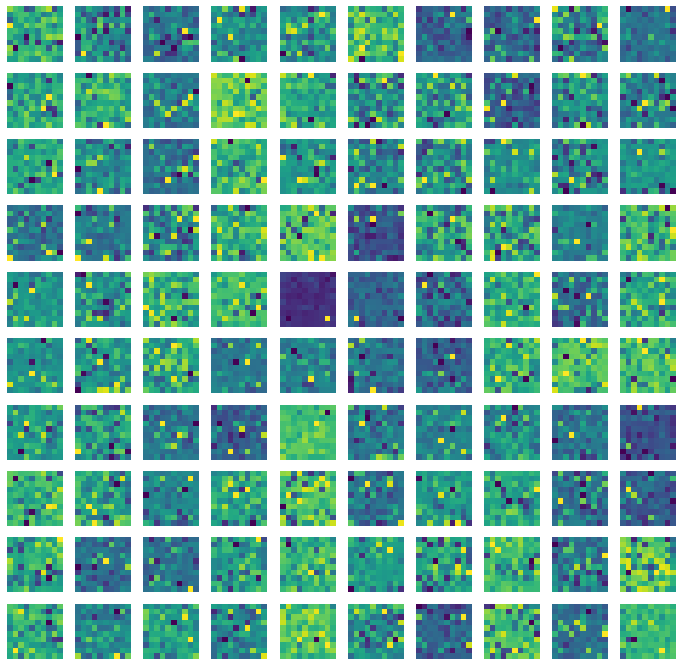

In [39]:
plt.figure(figsize=(12, 12), facecolor='w')
visualize_RBM_weights(dbnmodel.W2.data, 10, 10, slice_shape=(10, 10))

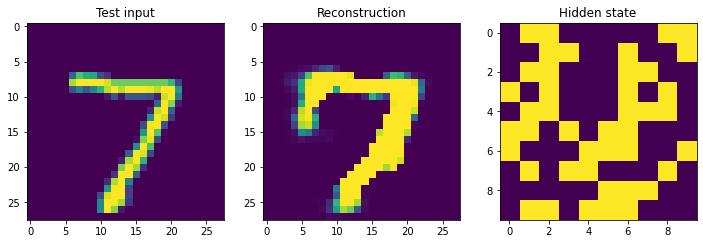

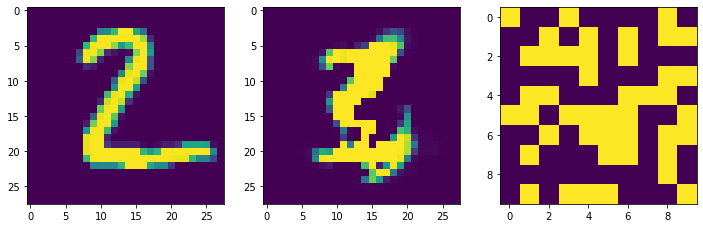

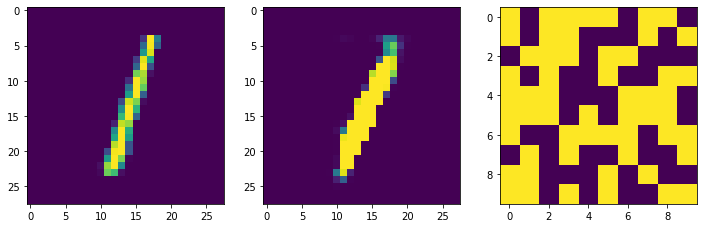

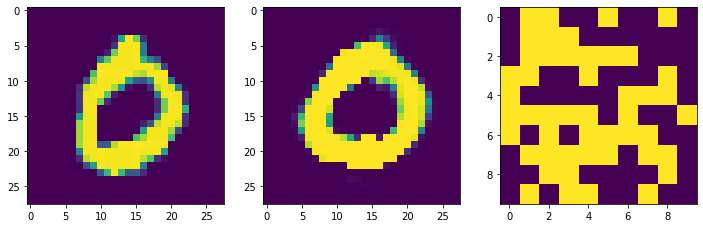

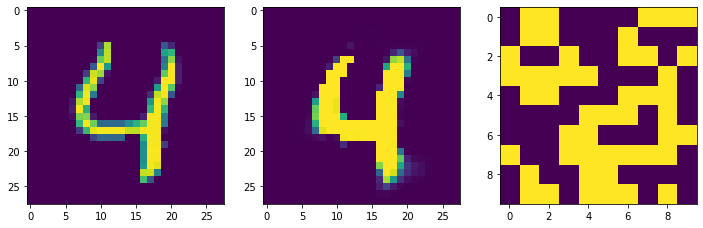

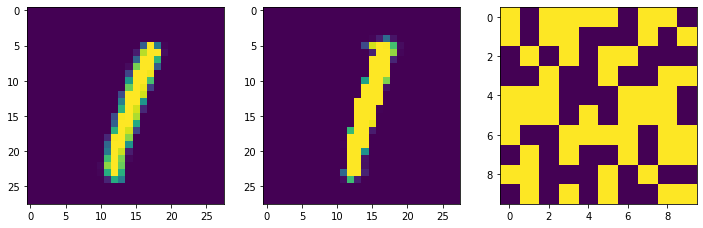

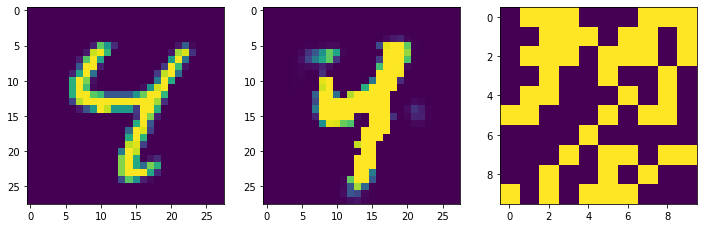

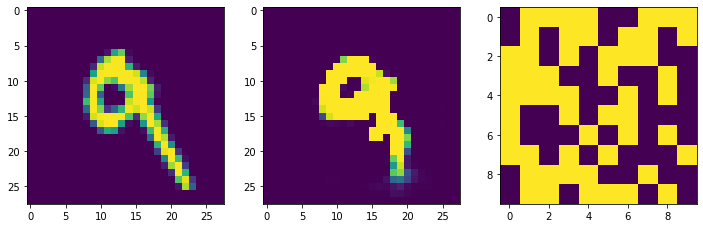

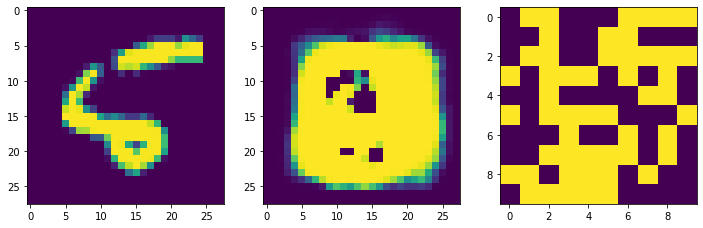

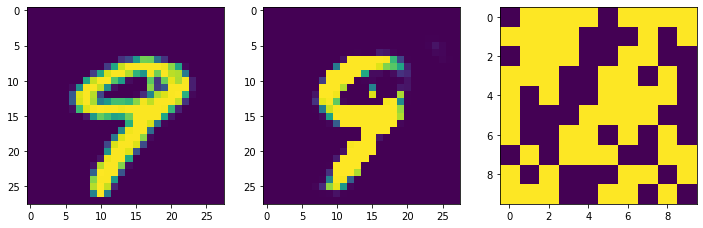

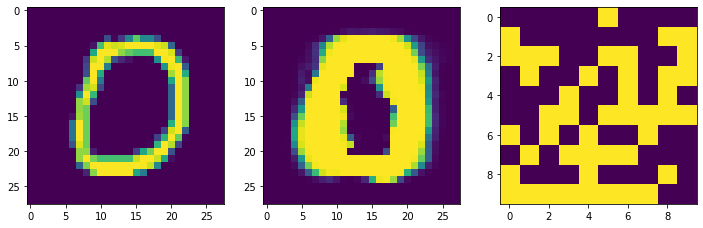

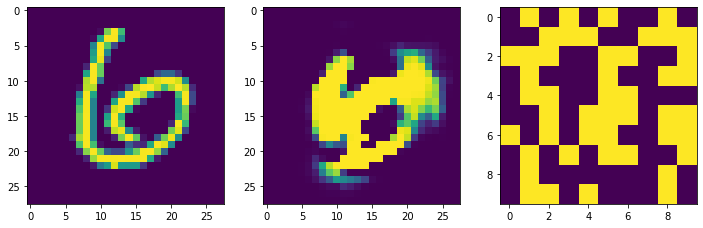

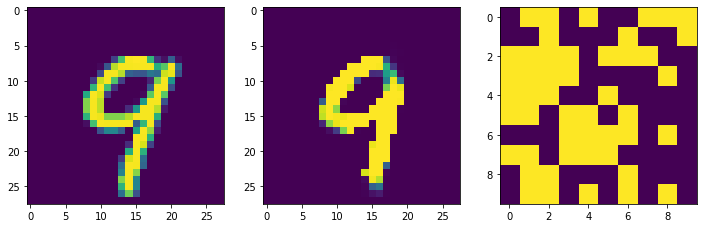

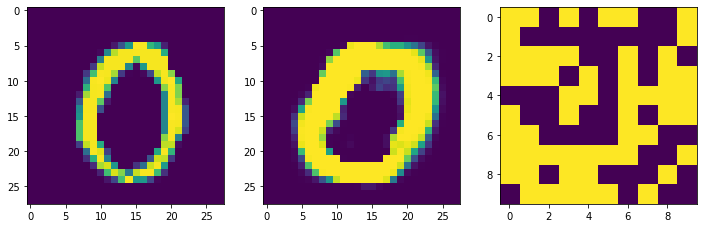

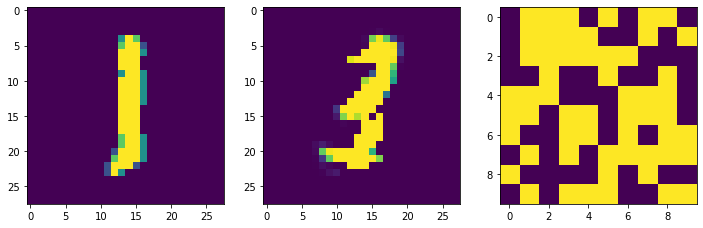

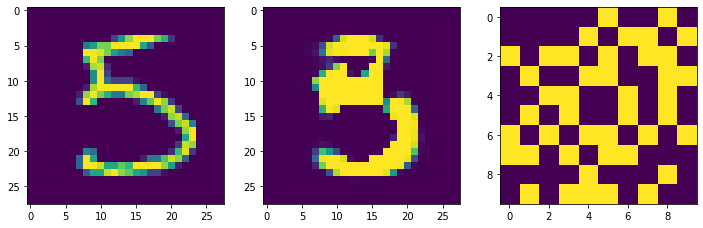

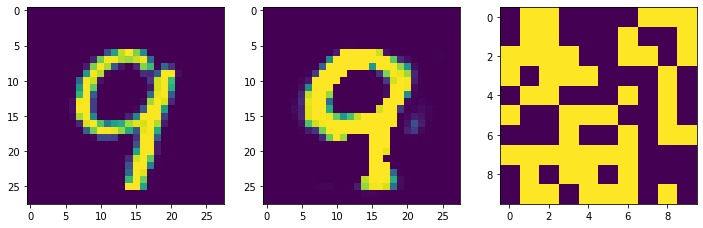

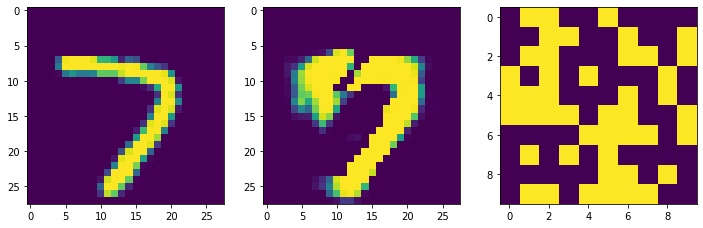

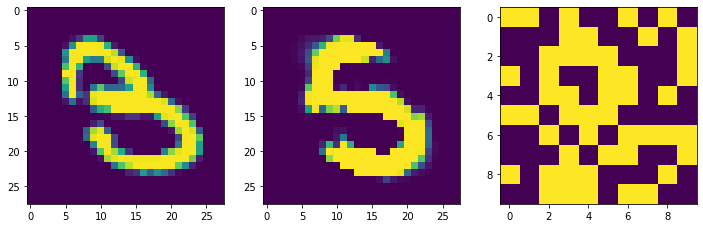

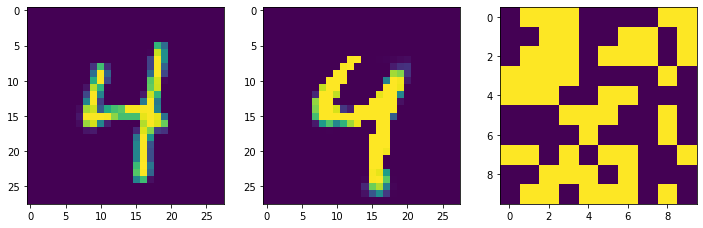

In [40]:
sample, _ = next(iter(test_loader))
sample = sample.view(-1, 784)

for idx in range(0, 20):
    h1up_prob, h1up, h2up_prob, h2up, h1down_prob, h1down, h2down_prob, h2down = dbnmodel(sample[idx, ...])
    v_prob, v, _, _ = dbnmodel.reconstruct(h2down)

    plt.figure(figsize=(4*3, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(sample[idx,...].view(28, 28))
    if idx == 0:
        plt.title("Test input")
    
    plt.subplot(1, 3, 2)
    plt.imshow(v_prob[0, ...].view(28, 28))
    if idx == 0:
        plt.title("Reconstruction")
    
    plt.subplot(1, 3, 3)
    plt.imshow(h2down.view(10, 10))
    if idx == 0:
        plt.title("Hidden state")

In [41]:
# Generiranje uzoraka iz slučajnih vektora
r_input = np.random.rand(100, HIDDEN_SIZE)
r_input[r_input > 0.9] = 1 # postotak aktivnih - slobodno varirajte
r_input[r_input < 1] = 0
r_input = r_input * 20 # pojačanje za slučaj ako je mali postotak aktivnih

s = 10
i = 0
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s

v_out_prob, v_out, h2down_prob, h2down = dbnmodel.reconstruct(torch.from_numpy(r_input).float(), 1000)

<Figure size 1152x1152 with 0 Axes>

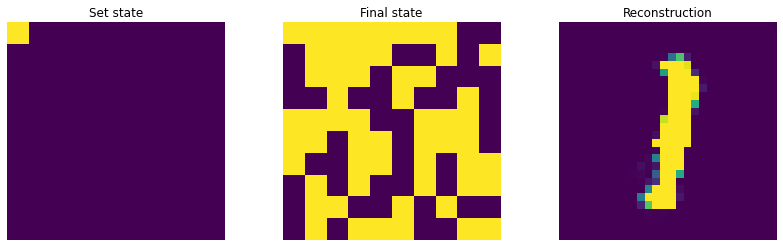

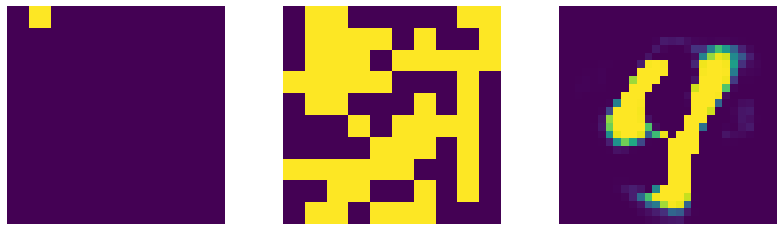

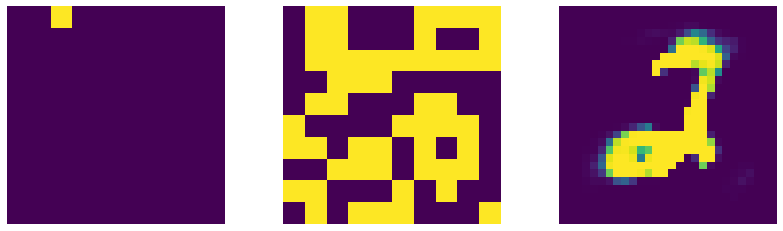

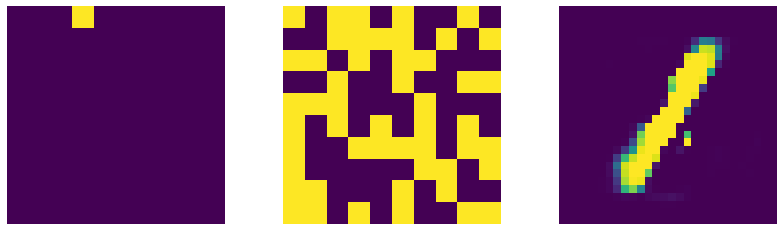

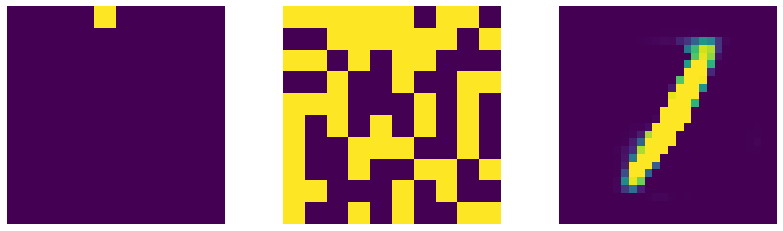

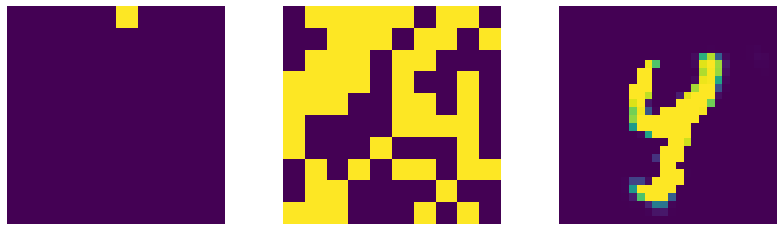

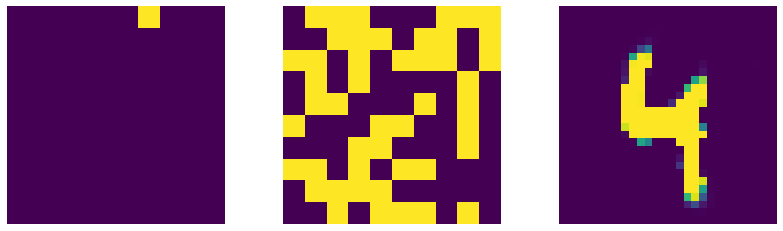

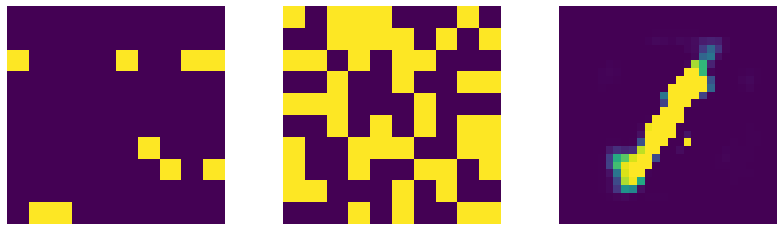

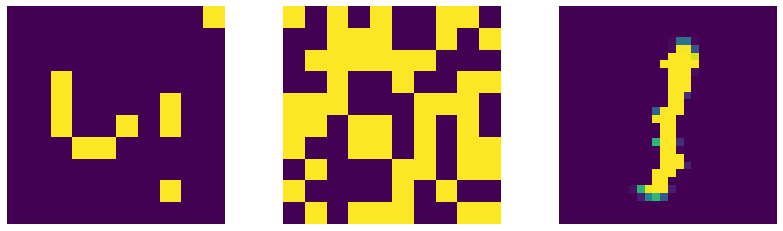

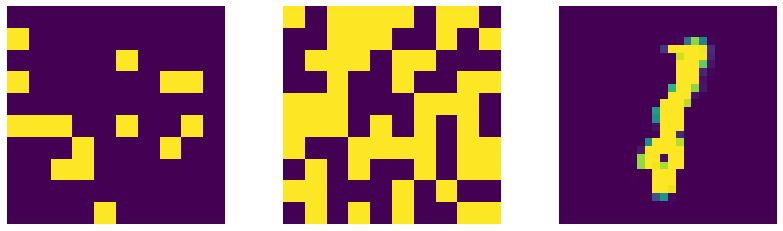

In [42]:
plt.figure(figsize=(16, 16))
for idx in range(0, 10):
    plt.figure(figsize=(14, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(r_input[idx, ...].reshape(10, 10))
    if idx == 0:
        plt.title("Set state")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(h2down[idx, ...].view(10, 10))
    if idx == 0:
        plt.title("Final state")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(v_out_prob[idx, ...].view(28, 28))
    if idx == 0:
        plt.title("Reconstruction")
    plt.axis('off')

In [43]:
with open('zad2_dbn.th', 'wb') as f:
    torch.save({
        'W1': dbnmodel.W1,
        'v1': dbnmodel.v_bias,
        'h1': dbnmodel.h1_bias,
        'W2': dbnmodel.W2,
        'h2': dbnmodel.h2_bias
    }, f)

### 3. zadatak - Deep belief network with generative fine tuning

Kako bi se dodatno poboljšala generativna svojstva DBN-a, može se provesti generativni fine-tuning parametara mreže. U 2. zadatku, prilikom rekonstruiranja korištene su iste težine i pomaci u prolascima prema dolje i prema gore. Kod fine-tuninga, parametri koji vežu sve slojeve osim dva najgornja, razdvajaju se u dva skupa. Matrice težina između nižih slojeva dijele se na: $\mathbf R_n$ za prolaz prema gore i $\mathbf W'_n$ za prolaz prema dolje. Inicijalno su obje matrice jednake originalnoj matrici $\mathbf W_n$. Kod prolaza prema gore (faza budnosti - wake phase) određuju se nova stanja viših skrivenih slojeva $\mathbf s^{(n)}$ iz nižih stanja $\mathbf s^{(n-1)}$ pomoću matrica $\mathbf R$ postupkom uzorkovanja ($sample \left(\sigma \left(\mathbf R_n \mathbf s^{(n-1)} + \mathbf b^{up}_n\right)\right) \to \mathbf s^{(n)}$) . Pri prolasku prema dolje (faza spavanja - sleep phase) određuju se "rekonstrukcije" nižih stanja $\mathbf s^{(n-1)}$ iz $\mathbf s^{(n)}$ i matrica $\mathbf W'$ ($sample \left( \sigma \left(\mathbf W'_n \mathbf s^{(n)} + \mathbf b^{down}_{n-1} \right) \right) \to \mathbf s^{(n-1)}$). Najgornja dva sloja su klasični RBM i dijele istu matricu težina za prolaske u oba smjera, a modificiranje tih težina provodi se na isti način kao u 1.zadatku.

Treniranje težina između nižih slojeva je drugačije. Matrice $\mathbf W'_n$ se korigiraju kada se određuju nova stanja pomoću matrica $\mathbf R_n$ u prolasku prema gore. U prolasku prema dolje korigiraju se matrice $\mathbf R_n$. Vektori pomaka pojedinih slojeva $\mathbf b_n$ se isto dijele na varijante za prolaz prema gore $\mathbf b_n^{up}$ i za ptrolaz prem dolje $\mathbf b_n^{down}$. Inicijalni pomaci jednaki su originalnim pomacima $\mathbf b$.

Za korekciju matrica $\mathbf W'_n$ prilikom prolaska prema gore ($sample \left(\sigma \left(\mathbf R_n \mathbf s^{(n-1)} + \mathbf b^{up}_n\right)\right) \to \mathbf s^{(n)}$) provodi se i $sample \left( \sigma \left(\mathbf W'_n \mathbf s^{(n)} + \mathbf b^{down}_{n-1} \right) \right) \to \mathbf s^{(n-1)novo}$. Korekcija elemenata radi se na sljedeći način
$\Delta w'_{\mathit{ij}}=\eta
s_{j}^{(n)}(s_{i}^{(n-1)}-s_{i}^{(n-1)\mathit{novo}})$
Korekcija pomaka za prolaz prema dolje provodi se na sljedeći način
$\Delta b_{\mathit{i}}^{\mathit{down}}=\eta
(s_{i}^{(n-1)}-s_{i}^{(n-1)\mathit{novo}})$

Za korekciju matrica $\mathbf R_n$ prilikom prolaska prema dolje ($sample \left( \sigma \left(\mathbf W'_n \mathbf s^{(n)} + \mathbf b^{down}_{n-1} \right) \right) \to \mathbf s^{(n-1)}$) provodi se i $sample \left(\sigma \left(\mathbf R_n \mathbf s^{(n-1)} + \mathbf b^{up}_n\right)\right) \to \mathbf s^{(n)novo}$. Korekcija elemenata radi se na sljedeći način
$\Delta r_{\mathit{ij}}=\eta
s_{i}^{(n-1)}(s_{j}^{(n)}-s_{j}^{(n)\mathit{novo}})$
Korekcija pomaka za prolaz prema dolje provodi se na sljedeći način
$\Delta b_{\mathit{i}}^{\mathit{up}}=\eta
(s_{i}^{(n)}-s_{i}^{(n)\mathit{novo}})$

Navedeni postupak provodi se za svaki uzorak za treniranje te se naziva up-down algoritam (ponegdje i wake-sleep algoritam).

HINT: pseudokod za treniranje četveroslojnog DBN-a nalazi se u dodacima ovog [članka](https://www.cs.toronto.edu/~hinton/absps/fastnc.pdf)

<center>
    <div>
      <img src="https://dlunizg.github.io/assets/lab4/DBN2.svg" width="30%">
    </div>
</center>



Implementirajte postupak generativnog fine-tuninga na DBN iz 2. zadatka. Za treniranje gornjeg RBM-a koristite CD-2.

**Podzadaci:**

1. Vizualizirajte konačne varijante matrica $\mathbf W'$, $\mathbf R$ i njihovu apsolutnu razliku.
2. Vizualizirajte rezultate rekonstrukcije prvih 10 testnih uzoraka MNIST baze.
3. Slučajno inicijalizirajte krovni skriveni sloj, provedite nekoliko Gibbsovih uzorkovanje te vizualizirajte generirane uzorke vidljivog sloja.
4. Težine naučenog modela spremite i u datoteku "zad3_dbn_ft.th". Uploadajte tu datoteku na Moodle.
5. Sve grafove tražene u podzadacima 1 i 2 predajte na Moodle.


**NAPOMENA**: Osim nadopunjavanja koda koji nedostaje, predložak se treba prilagođavati prema potrebi, a može i prema vlastitim preferencijama. Stoga **budite oprezni s tvrdnjama da vam neki dio koda ne radi!**

In [155]:
class DBNWithFineTuning():

    def __init__(self, base_dbn: DBN, cd_k=1):
        self.v_size = base_dbn.v_size
        self.h1_size = base_dbn.h1_size
        self.h2_size = base_dbn.h2_size
        self.cd_k = cd_k
        
        normal_dist = tdist.Normal(0, 0.1)
        
        self.R1 = base_dbn.W1.clone()
        self.W1_down = base_dbn.W1.T.clone()
        self.v1_bias = base_dbn.v_bias.clone()
        self.h1_up_bias = base_dbn.h1_bias.clone()
        self.h1_down_bias = base_dbn.h1_bias.clone()
        
        self.W2 = base_dbn.W2.clone()
        self.h2_bias = base_dbn.h2_bias.clone()
    
    
    def forward(self, batch, steps=None):
        batch = batch.view(-1, 784)
        
        h1_up_prob = torch.sigmoid(torch.matmul(self.R1.T, batch.T).T + self.h1_up_bias)
        h1_up = h1_up_prob.bernoulli()

        v1_up_down_prob = torch.sigmoid(torch.matmul(self.W1_down.T, h1_up.T).T + self.v1_bias)
        v1_up_down = v1_up_down_prob.bernoulli()

        h2_up_prob = torch.sigmoid(torch.matmul(self.W2.T, h1_up.T).T + self.h2_bias)
        h2_up = h2_up_prob.bernoulli()
        
        h1_down_prob, h1_down, h2_down_prob, h2_down = self.gibbs_sampling(h2_up, steps=steps)
        
        v1_down_prob = torch.sigmoid(torch.matmul(self.W1_down.T, h1_down.T).T + self.v1_bias)
        v1_down = v1_down_prob.bernoulli()

        h1_down_up_prob = torch.sigmoid(torch.matmul(self.R1.T, v1_down.T).T + self.h1_down_bias)
        h1_down_up = h1_down_up_prob.bernoulli() 

        return h1_up_prob, h1_up, v1_up_down_prob, v1_up_down, h2_up_prob, h2_up, h1_down_prob, h1_down, h2_down_prob, h2_down, v1_down_prob, v1_down, h1_down_up_prob, h1_down_up
    
    def gibbs_sampling(self, h2, steps=None):
        h2_down = h2
        
        steps_to_do = self.cd_k
        
        if steps is not None:
            steps_to_do = steps
        
        
        for step in range(0, self.cd_k):
            h1_down_prob = torch.sigmoid(torch.matmul(self.W2, h2_down.T).T + self.h1_down_bias)
            h1_down = h1_down_prob.bernoulli()

            h2_down_prob = torch.sigmoid(torch.matmul(self.W2.T, h1_down.T).T + self.h2_bias)
            h2_down = h2_down_prob.bernoulli()
            
        return h1_down_prob, h1_down, h2_down_prob, h2_down


    
    def reconstruct(self, h2, steps=None):
        h1_down_prob, h1_down, h2_down_prob, h2_down = self.gibbs_sampling(h2, steps)
        
        v_out_tmp_prob = torch.sigmoid(torch.matmul(self.W2, h2_down.T).T + self.h1_down_bias)
        v_out_tmp = v_out_tmp_prob.bernoulli()
        v_out_prob =  torch.sigmoid(torch.matmul(self.W1_down.T, v_out_tmp.T).T + self.v1_bias)
        v_out = v_out_prob.bernoulli()

        return v_out_prob, v_out, h2_down_prob, h2_down
    
    def update_weights_for_batch(self, batch, learning_rate=0.01):
        h1_up_prob, h1_up, v1_up_down_prob, v1_up_down, h2_up_prob, h2_up, h1_down_prob, h1_down, h2_down_prob, h2_down, v1_down_prob, v1_down, h1_down_up_prob, h1_down_up = self.forward(batch)
        
        dw1_down = h1_up.T @ (batch - v1_up_down)
        self.W1_down = self.W1_down + learning_rate * dw1_down

        dr1 = v1_down.T @ (h1_down - h1_down_up)
        self.R1 = self.R1 + learning_rate * dr1
        
        dv1 = v1_up_down - v1_down
        self.v1_bias = self.v1_bias + learning_rate * torch.mean(dv1, axis=0)
        
        dh1_down = h1_up - h1_down
        self.h1_down_bias = self.h1_down_bias + learning_rate * torch.mean(dh1_down, axis=0)
        
        dh1_up = h1_down - h1_down_up
        self.h1_up_bias = self.h1_up_bias + learning_rate * torch.mean(dh1_up, axis=0)
        
        w2_positive_grad = h1_up.T @ h2_up
        w2_negative_grad = h1_down.T @ h2_down
        dw2 = (w2_positive_grad - w2_negative_grad) / h1_up.shape[0]
        self.W2 = self.W2 + learning_rate * dw2
        
        dh2_bias = h2_up - h2_down
        self.h2_bias = self.h2_bias + learning_rate * torch.mean(dh2_bias, axis=0)
        
    def __call__(self, batch):
        return self.forward(batch)

In [157]:
dbnmodel_ft = DBNWithFineTuning(dbnmodel, cd_k=2)
for curr_epoch in tqdm.tqdm(range(0, EPOCHS)):
    for sample, label in train_loader:
        sample = sample.view(-1, 784)
        dbnmodel_ft.update_weights_for_batch(sample, 0.01)

100%|██████████| 100/100 [19:34<00:00, 11.74s/it]


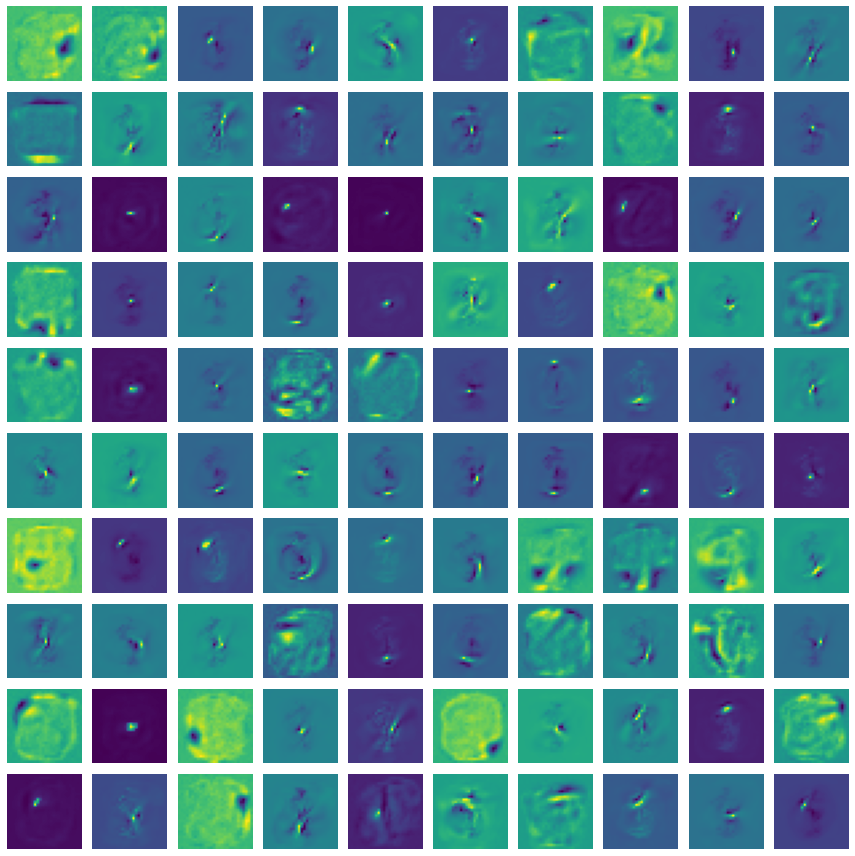

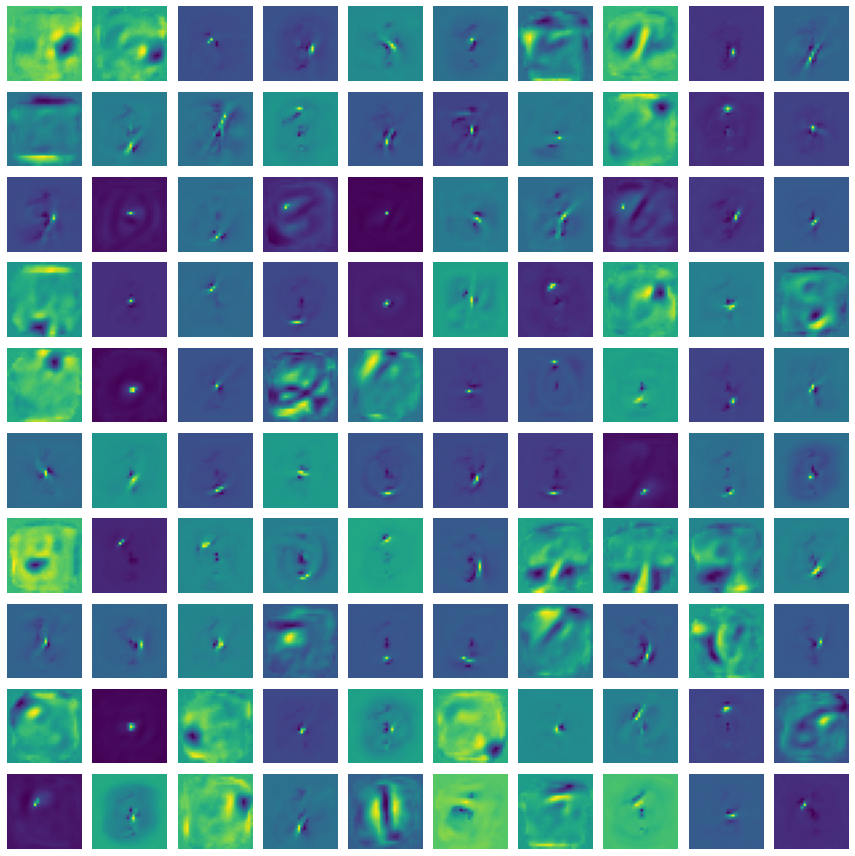

In [134]:
plt.figure(figsize=(12, 12), facecolor='w')
visualize_RBM_weights(dbnmodel_ft.R1.data, 10, 10)
plt.tight_layout()


plt.figure(figsize=(12, 12), facecolor='w')
visualize_RBM_weights(dbnmodel_ft.W1_down.T.data, 10, 10)
plt.tight_layout()

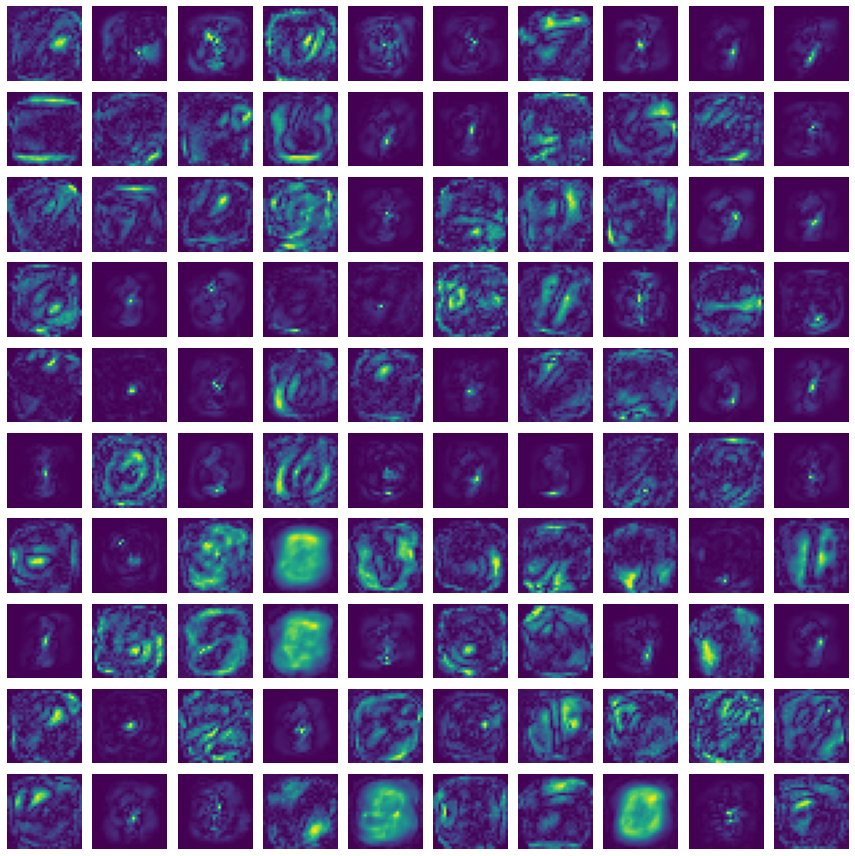

In [158]:
difference = torch.abs(dbnmodel_ft.R1.data - dbnmodel_ft.W1_down.T.data)

plt.figure(figsize=(12, 12), facecolor='w')
visualize_RBM_weights(difference, 10, 10)
plt.tight_layout()

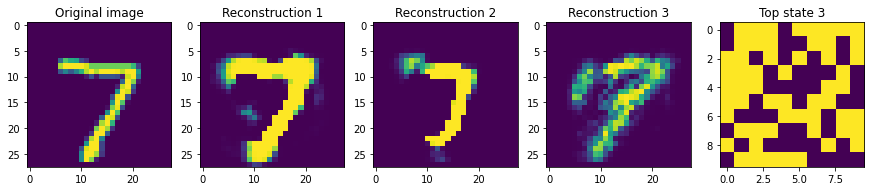

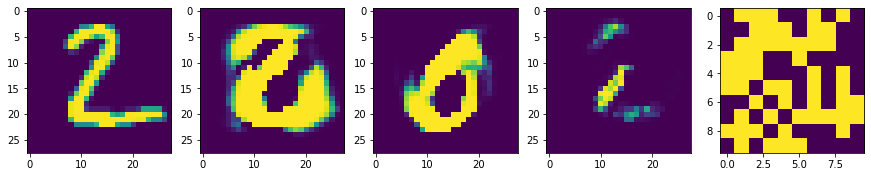

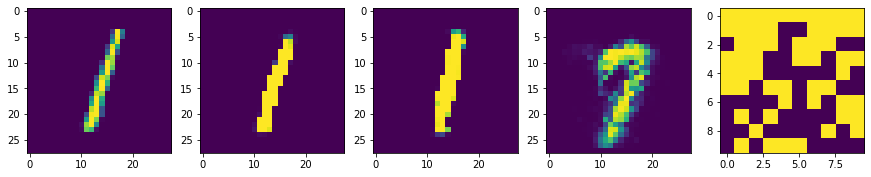

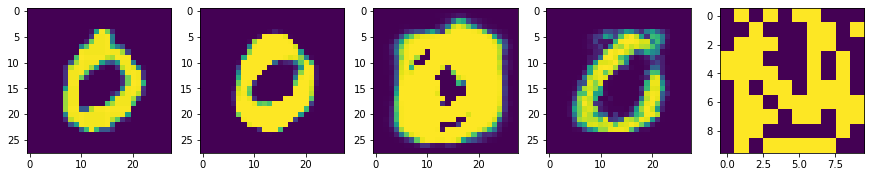

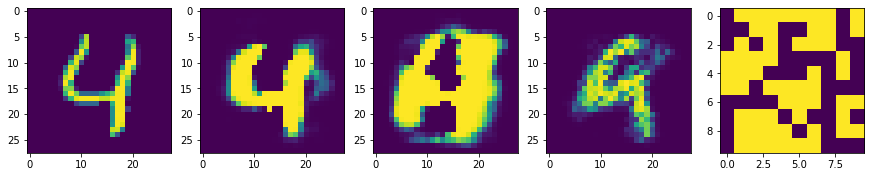

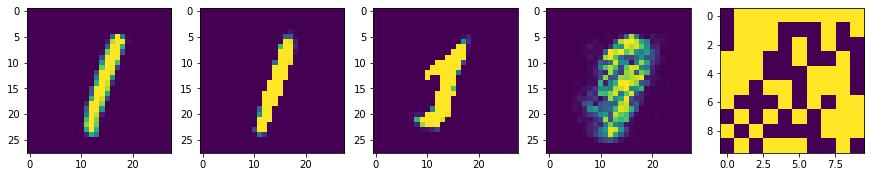

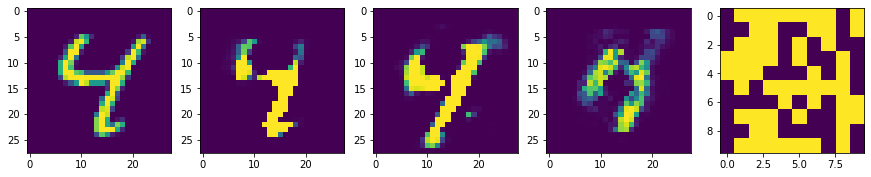

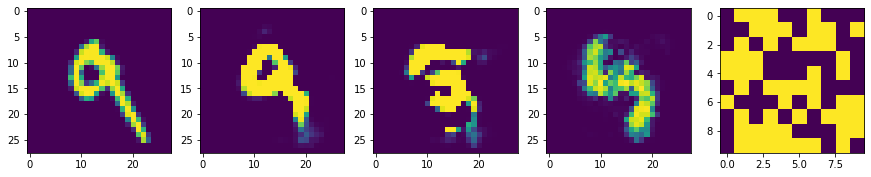

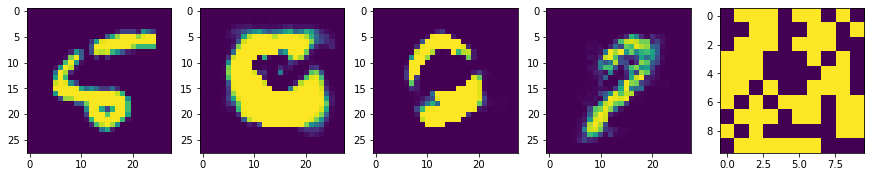

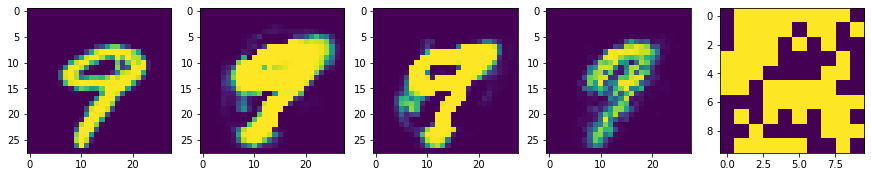

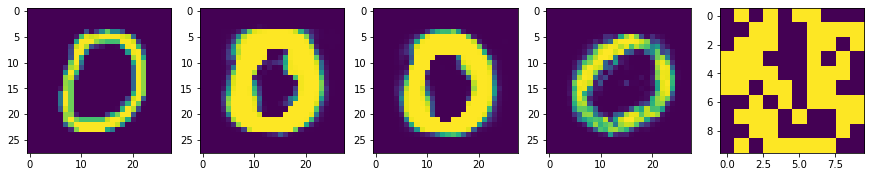

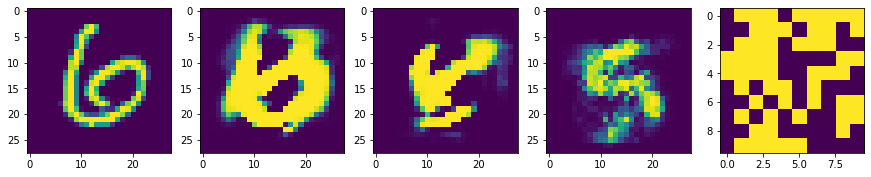

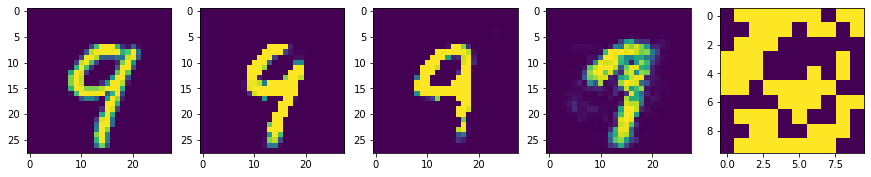

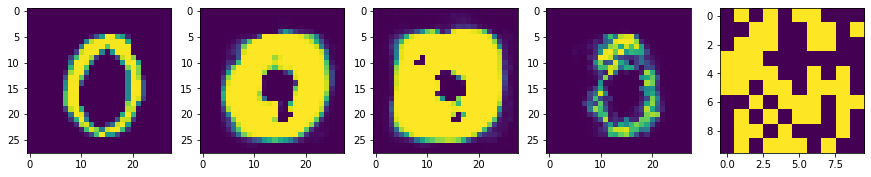

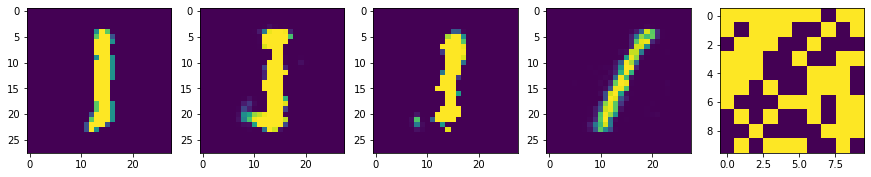

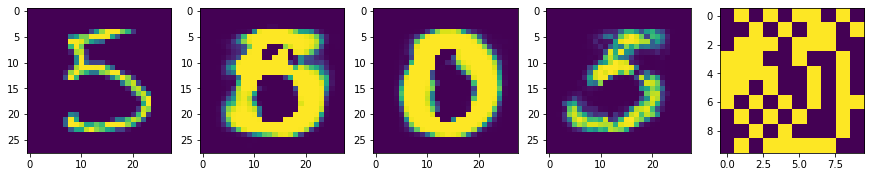

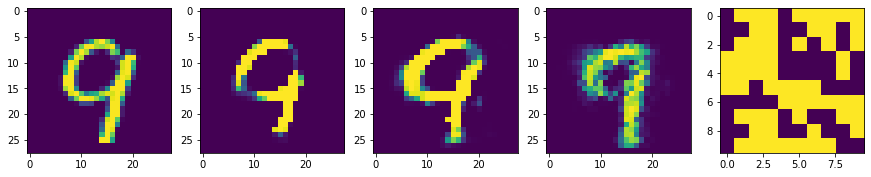

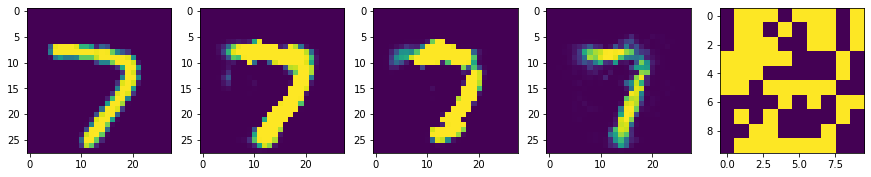

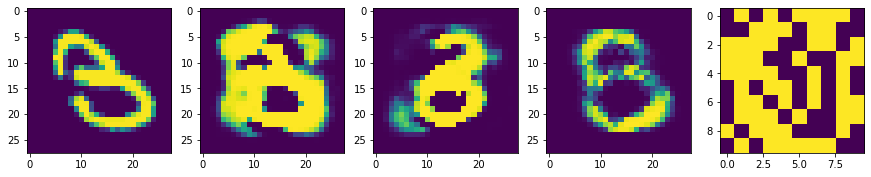

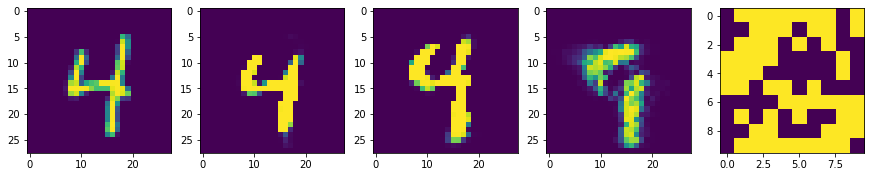

In [159]:
sample, _ = next(iter(test_loader))
sample = sample.view(-1, 784)

for idx in range(0, 20): 
    # rbn reconstruct
    _, _, _, _, recon1, _ = model(sample[idx, ...])
    
    # dbn reconstruct
    _, _, _, _, _, _, _, h2down = dbnmodel.forward(sample[idx, ...])
    recon2, _, _, _ = dbnmodel.reconstruct(h2down)
    
    # dbn fine tune reconstruct
    _, _, _, _, _, _, _, _, _, h2_down, _, _, _, _ = dbnmodel_ft(sample[idx, ...])
    recon3, _, _, _ = dbnmodel_ft.reconstruct(h2_down, 2)
    
    plt.figure(figsize=(5*3, 3))
    plt.subplot(1, 5, 1)
    plt.imshow(sample[idx, ...].view(28, 28))
    if idx == 0:
        plt.title("Original image")
    
    plt.subplot(1, 5, 2)
    plt.imshow(recon1.view(28, 28))
    if idx == 0:
        plt.title("Reconstruction 1")
    
    plt.subplot(1, 5, 3)
    plt.imshow(recon2.view(28, 28))
    if idx == 0:
        plt.title("Reconstruction 2")
    
    plt.subplot(1, 5, 4)
    plt.imshow(recon3.view(28, 28))
    if idx == 0:
        plt.title("Reconstruction 3")
    
    plt.subplot(1, 5, 5)
    plt.imshow(h2_down.view(10, 10))
    if idx == 0:
        plt.title("Top state 3")


In [160]:
# Generiranje uzoraka iz slučajnih vektora krovnog skrivenog sloja
r_input = np.random.rand(100, 100)
r_input[r_input > 0.9] = 1
r_input[r_input < 1] = 0

s = 10
i = 0
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s
i += 1
r_input[i,:] = 0
r_input[i,i]= s

# inn = h2_downs[0:100,:]
# out3_prob, out3, hout3 = sess3.run((v1_down_prob, v1_down, h2_down), feed_dict={h2_up: r_input})

# for i in range(1000):
#     out3_prob, out3, hout3 = sess3.run((v1_down_prob, v1_down, h2_down), feed_dict={h2_up: hout3})
    
v_out_prob, v_out, h2_down_prob, h2down = dbnmodel_ft.reconstruct(torch.from_numpy(r_input).float(),1000)

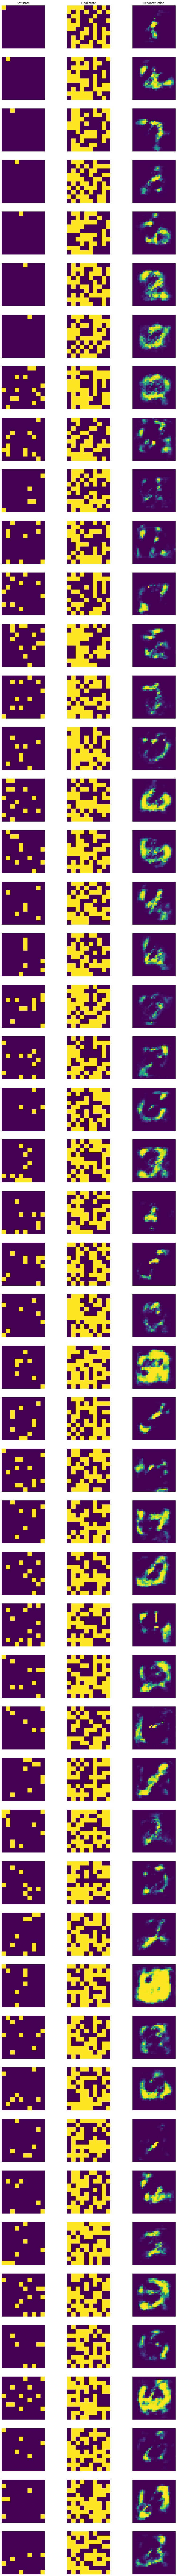

In [161]:
plt.figure(figsize=(14, 4 * 50))
for idx in range(0, 50):
    
    plt.subplot(50, 3, 3*idx+1)
    plt.imshow(r_input[idx, ...].reshape(10, 10))
    if idx == 0:
        plt.title("Set state")
    plt.axis('off')
    
    plt.subplot(50, 3, 3*idx+2)
    plt.imshow(h2down[idx, ...].view(10, 10))
    if idx == 0:
        plt.title("Final state")
    plt.axis('off')
    
    plt.subplot(50, 3, 3*idx+3)
    plt.imshow(v_out_prob[idx, ...].view(28, 28))
    if idx == 0:
        plt.title("Reconstruction")
    plt.axis('off')

In [162]:
with open('zad3_dbn_ft.th', 'wb') as f:
    torch.save({
        'R1': dbnmodel_ft.R1,
        'W1_down': dbnmodel_ft.W1_down,
        'v1': dbnmodel_ft.v1_bias,
        'h1_up': dbnmodel_ft.h1_up_bias,
        'h1_down': dbnmodel_ft.h1_down_bias,
        'W2': dbnmodel_ft.W2,
        'h2': dbnmodel_ft.h2_bias
    }, f)